In [29]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.model_selection import GridSearchCV, StratifiedKFold  # , cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, confusion_matrix  # , classification_report
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from scipy import integrate


In [30]:
DATA_PATH = "./data/"
RED = DATA_PATH + "just_red/"

In [31]:
diego_t = pd.read_pickle(DATA_PATH+"/features/T.pickle")
print(diego_t.shape)

(46959, 32)


In [32]:
diego_t['FClass'] = diego_t['Class']=="SN"

In [33]:
diego_t["fact_Class"] = pd.factorize(diego_t['FClass'])[0]

In [34]:
diego_t.sample(frac=1)


,,Class,ObsCount,amplitude,beyond1st,flux_percentile_ratio_mid20,flux_percentile_ratio_mid35,flux_percentile_ratio_mid50,flux_percentile_ratio_mid65,flux_percentile_ratio_mid80,kurtosis,...,poly4_t2,poly4_t3,poly4_t4,skew,small_kurtosis,std,stetson_j,stetson_k,FClass,fact_Class
ID,copy_num,,,,,,,,,,,,,,,,,,,,,
TranID1304190040724142741,4,AGN,119,1.682443,0.268908,0.134128,0.225741,0.373560,0.525424,0.862968,0.855801,...,-9.724429e-07,-9.072920e-10,-1.729040e-13,0.833635,-3.077807,0.646594,0.329007,0.804220,False,0
TranID1309261570524136874,0,AGN,151,1.118900,0.357616,0.116705,0.202733,0.313024,0.495596,0.786791,-0.581667,...,-8.742011e-07,-1.764577e-10,2.951694e-13,0.133916,-3.060947,0.480922,1.254467,0.785795,False,0
TranID1112251290214173345,8,CV,48,1.284276,0.333333,0.165265,0.236381,0.388569,0.513532,0.718148,-0.737069,...,2.170182e-06,-8.503398e-10,-1.919424e-12,0.487476,-3.201449,0.665011,2.539706,0.871584,False,0
TranID1105041380534110947,7,SN,35,1.862070,0.314286,0.051481,0.096075,0.184770,0.280489,0.624407,0.102440,...,-1.169756e-06,4.867821e-10,7.690123e-13,0.271401,-3.284091,0.818521,0.763710,0.672405,True,1
TranID1010130070244116923,4,AGN,265,1.415266,0.290566,0.109389,0.216319,0.365543,0.473214,0.684839,0.317352,...,4.331302e-07,3.016527e-10,-1.395313e-13,0.379733,-3.034395,0.460970,0.543846,0.776114,False,0
TranID909160090164129042,10,SN,25,1.268792,0.280000,0.231539,0.400331,0.764366,0.877281,0.975131,1.101037,...,2.765669e-06,-1.002112e-09,-1.576310e-12,0.809419,-3.415020,0.553597,0.981647,0.803280,True,1
TranID1104290011144106641,9,SN,9,0.861847,0.444444,0.175536,0.333615,0.504909,0.679513,0.863944,-1.792529,...,6.506523e-06,-5.417541e-09,-4.771448e-12,-0.220769,-4.571429,0.656912,0.830736,0.828198,True,1
TranID1005311180534119112,5,Blazar,169,1.987198,0.331361,0.056989,0.099665,0.201467,0.352395,0.646104,0.040630,...,-5.702661e-08,-1.444926e-09,-6.833864e-13,0.471011,-3.054325,0.842256,1.718410,0.743660,False,0
TranID1004051040704109194,1,AGN,353,1.105982,0.303116,0.261170,0.390524,0.486098,0.616209,0.828974,0.150600,...,3.025010e-07,8.964290e-11,-8.002297e-14,0.723553,-3.025739,0.402965,2.287789,0.874495,False,0


In [36]:
all_train, all_test= train_test_split(diego_t,test_size = 0.25)

In [37]:
all_test = all_test.iloc[all_test.index.get_level_values('copy_num') == 0]

In [38]:
all_test = all_test.sample(frac=1)
all_train = all_train.sample(frac=1)


In [39]:
features = all_train.columns[2:-2]
print(features)
y_train = np.array(all_train['fact_Class'])
y_test = np.array(all_test['fact_Class'])

Index(['amplitude', 'beyond1st', 'flux_percentile_ratio_mid20',
       'flux_percentile_ratio_mid35', 'flux_percentile_ratio_mid50',
       'flux_percentile_ratio_mid65', 'flux_percentile_ratio_mid80',
       'kurtosis', 'max_slope', 'median_absolute_deviation',
       'median_buffer_range_percentage', 'pair_slope_trend',
       'pair_slope_trend_last_30', 'percent_amplitude',
       'percent_difference_flux_percentile', 'poly1_t1', 'poly2_t1',
       'poly2_t2', 'poly3_t1', 'poly3_t2', 'poly3_t3', 'poly4_t1', 'poly4_t2',
       'poly4_t3', 'poly4_t4', 'skew', 'small_kurtosis', 'std', 'stetson_j',
       'stetson_k'],
      dtype='object')


In [40]:
print(len(y_train))
print(len(y_test))


35219
1096


In [41]:
clf = RandomForestClassifier(n_estimators=50,random_state=0, class_weight='balanced')

In [42]:
clf.fit(all_train[features], y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [43]:
y_test = np.array(all_test['fact_Class'])

In [44]:
clf.score(all_test[features],y_test)

0.926094890510949

In [45]:
preds1 = clf.predict_proba(all_test[features])
print(preds1)

[[0.88 0.12]
 [0.28 0.72]
 [0.66 0.34]
 ...
 [0.12 0.88]
 [0.02 0.98]
 [0.2  0.8 ]]


In [46]:
preds = clf.predict(all_test[features])
pd.crosstab(preds, y_test, rownames=['Predicted '], colnames=['Actual '])

Actual,0,1
Predicted,,
0,744,59
1,22,271


In [47]:
f1_score(preds,y_test)

0.869983948635634

In [48]:
tp = pd.crosstab(preds, y_test, rownames=['Predicted '], colnames=['Actual '])[1][1]
tn = pd.crosstab(preds, y_test, rownames=['Predicted '], colnames=['Actual '])[0][0]
fp = pd.crosstab(preds, y_test, rownames=['Predicted '], colnames=['Actual '])[0][1]
fn = pd.crosstab(preds, y_test, rownames=['Predicted '], colnames=['Actual '])[1][0]
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1  = 2*precision*recall/(precision+recall)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print('precision ',precision)
print('recall ', recall)
print('f1 ',f1)
print('accuracy ',accuracy)

precision  0.9249146757679181
recall  0.8212121212121212
f1  0.869983948635634
accuracy  0.926094890510949


Text(0.5,1,'SN within transients')

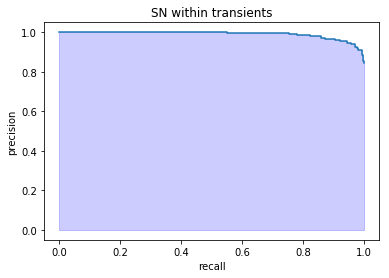

In [49]:
preds1 = clf.predict_proba(all_test[features])
precision, recall, _ = precision_recall_curve(y_test, preds1[:,0],pos_label=0)

plt.step(recall,precision)
plt.fill_between(recall, precision,step='pre', alpha=0.2,
                 color='b')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title("SN within transients")


In [50]:
# recall[-1]=0.00000000000001
# print(recall)
integrate.trapz(precision[::-1],recall[::-1])

0.9897745600126185

In [51]:
print(precision)

[0.84361233 0.85458613 0.86523216 0.87214612 0.88119954 0.88515081
 0.88914819 0.90272835 0.90942029 0.91779141 0.92652553 0.93107769
 0.93908629 0.94230769 0.94675325 0.94757536 0.95582329 0.95799458
 0.96127248 0.96443812 0.96536797 0.97054492 0.9787234  0.98136646
 0.98392283 0.98679868 0.99142367 0.99463327 0.99626866 0.99607843
 0.99794661 0.99781659 0.99763033 1.         1.         1.
 1.        ]


In [52]:
y_test

array([0, 1, 0, ..., 1, 1, 1])

In [53]:
preds = clf.predict(all_test[features])

In [54]:
f1_score(preds,y_test)

0.869983948635634

In [55]:
pd.crosstab(preds, y_test, rownames=['Predicted '], colnames=['Actual '])

Actual,0,1
Predicted,,
0,744,59
1,22,271


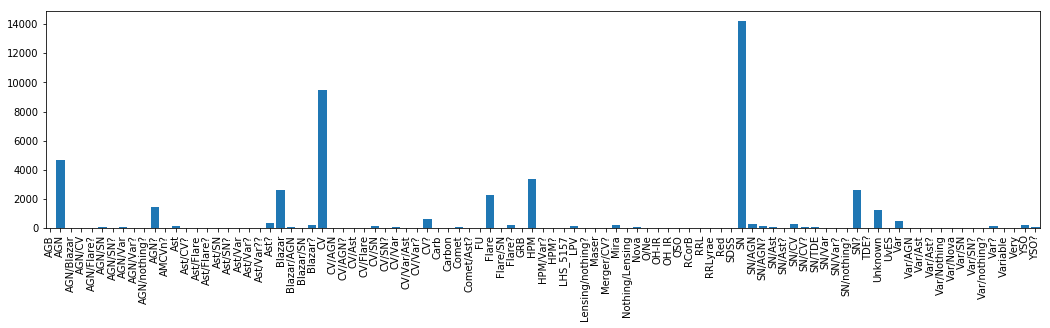

In [39]:
dfs = {}
for clase in diego_t.reset_index().Class.unique():
    dfs[clase] = diego_t[diego_t['Class']==clase]

numObjs = {}
for k in dfs.keys():
    numObjs[k] = len(dfs[k])

plt.bar(numObjs.keys(),numObjs.values())
plt.xticks(rotation='vertical')

N = len(numObjs)
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
